# Effect of AI on Customer Churn
## Predicting Customer Churn

### Import Libraries

In [80]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Import Dataset

In [136]:
# import train and test files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
0,1,59,2,7,7,2,18,5,2,1
1,2,49,2,6,5,1,3,2,0,0
2,3,35,2,3,3,3,8,2,1,1
3,4,63,2,3,3,2,6,6,2,1
4,5,28,4,6,6,1,11,3,-1,0


In [4]:
test.head()

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
0,1,59,1,2,3,1,11,5,-1,1
1,2,49,3,4,3,2,2,0,2,1
2,3,35,3,7,6,2,22,4,0,1
3,4,63,2,8,8,1,25,4,-1,1
4,5,28,4,5,5,2,14,1,1,1


### Data Exploration

#### Data dimensions, feature names and feature types

##### Training data

In [5]:
train.shape

(5000, 10)

In [6]:
train.columns

Index(['ID', 'Age', 'AI_Interaction_Level', 'Satisfaction_with_AI_Services',
       'AI_Personalization_Effectiveness', 'AI_Response_Time',
       'Overall_Usage_Frequency', 'Customer_Service_Interactions',
       'Change_in_Usage_Patterns', 'Customer_Churn'],
      dtype='object')

In [7]:
train.dtypes

ID                                  int64
Age                                 int64
AI_Interaction_Level                int64
Satisfaction_with_AI_Services       int64
AI_Personalization_Effectiveness    int64
AI_Response_Time                    int64
Overall_Usage_Frequency             int64
Customer_Service_Interactions       int64
Change_in_Usage_Patterns            int64
Customer_Churn                      int64
dtype: object

In [8]:
train['Customer_Churn'].value_counts(normalize=True)

Customer_Churn
0    0.5818
1    0.4182
Name: proportion, dtype: float64

In [9]:
train.describe(include='all')

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,42.575000,2.468800,5.51060,5.525800,1.981600,15.515000,5.066200,-0.005000,0.418200
std,1443.520003,12.554597,0.940853,2.86446,2.884129,0.815227,8.703018,3.178402,1.421049,0.493313
min,1.000000,21.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,-2.000000,0.000000
25%,1250.750000,32.000000,2.000000,3.00000,3.000000,1.000000,8.000000,2.000000,-1.000000,0.000000
50%,2500.500000,43.000000,2.000000,5.00000,5.000000,2.000000,16.000000,5.000000,0.000000,0.000000
75%,3750.250000,53.000000,3.000000,8.00000,8.000000,3.000000,23.000000,8.000000,1.000000,1.000000
max,5000.000000,64.000000,4.000000,10.00000,10.000000,3.000000,30.000000,10.000000,2.000000,1.000000


In [10]:
train.isnull().sum() # no missing values

ID                                  0
Age                                 0
AI_Interaction_Level                0
Satisfaction_with_AI_Services       0
AI_Personalization_Effectiveness    0
AI_Response_Time                    0
Overall_Usage_Frequency             0
Customer_Service_Interactions       0
Change_in_Usage_Patterns            0
Customer_Churn                      0
dtype: int64

##### Test data

In [11]:
test.shape

(1250, 10)

In [12]:
test.columns

Index(['ID', 'Age', 'AI_Interaction_Level', 'Satisfaction_with_AI_Services',
       'AI_Personalization_Effectiveness', 'AI_Response_Time',
       'Overall_Usage_Frequency', 'Customer_Service_Interactions',
       'Change_in_Usage_Patterns', 'Customer_Churn'],
      dtype='object')

In [13]:
test.describe(include='all')

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.0000,1250.000000
mean,625.500000,42.484000,2.464800,5.523200,5.521600,1.998400,15.598400,5.076800,0.0168,0.428800
std,360.988227,12.617048,0.949886,2.904929,2.921979,0.823006,8.650051,3.199108,1.4402,0.495103
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.0000,0.000000
25%,313.250000,31.000000,2.000000,3.000000,3.000000,1.000000,8.000000,2.000000,-1.0000,0.000000
50%,625.500000,43.000000,2.000000,6.000000,6.000000,2.000000,16.000000,5.000000,0.0000,0.000000
75%,937.750000,53.000000,3.000000,8.000000,8.000000,3.000000,23.000000,8.000000,1.0000,1.000000
max,1250.000000,64.000000,4.000000,10.000000,10.000000,3.000000,30.000000,10.000000,2.0000,1.000000


In [14]:
test.isnull().sum() # no missing data

ID                                  0
Age                                 0
AI_Interaction_Level                0
Satisfaction_with_AI_Services       0
AI_Personalization_Effectiveness    0
AI_Response_Time                    0
Overall_Usage_Frequency             0
Customer_Service_Interactions       0
Change_in_Usage_Patterns            0
Customer_Churn                      0
dtype: int64

### Data Wrangling and Visualization

<Axes: >

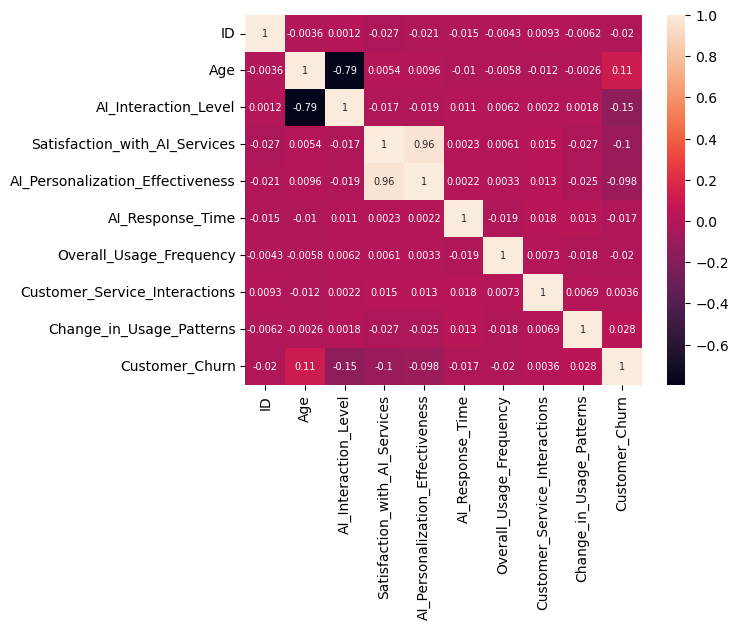

In [15]:
# create heat map of all variables
sns.heatmap(train.corr(), annot=True, annot_kws={"fontsize":7})

Observe a negative, high correlation between `Age` and `AI_Interaction_Level`, and a positive high correlation between`AI_Personalization_Effectiveness` and `Satisfaction_with_AI_Services`.

In [16]:
print(train['AI_Personalization_Effectiveness'].describe())
print(train['Satisfaction_with_AI_Services'].describe())

count    5000.000000
mean        5.525800
std         2.884129
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: AI_Personalization_Effectiveness, dtype: float64
count    5000.00000
mean        5.51060
std         2.86446
min         1.00000
25%         3.00000
50%         5.00000
75%         8.00000
max        10.00000
Name: Satisfaction_with_AI_Services, dtype: float64


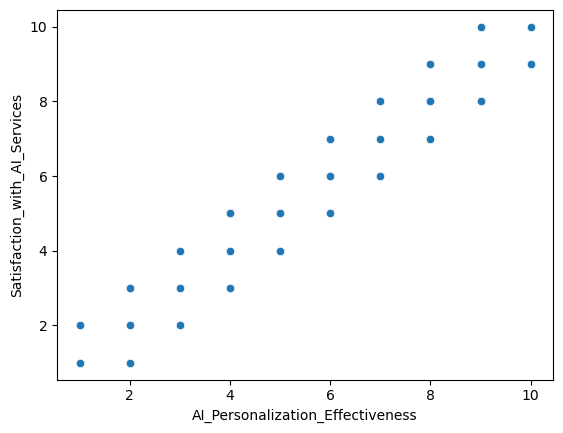

In [49]:
# create scatterplot of AI_Personalization_Effectiveness vs Satisfaction_with_AI_Services
ax = sns.scatterplot(x='AI_Personalization_Effectiveness', y='Satisfaction_with_AI_Services', data=train)


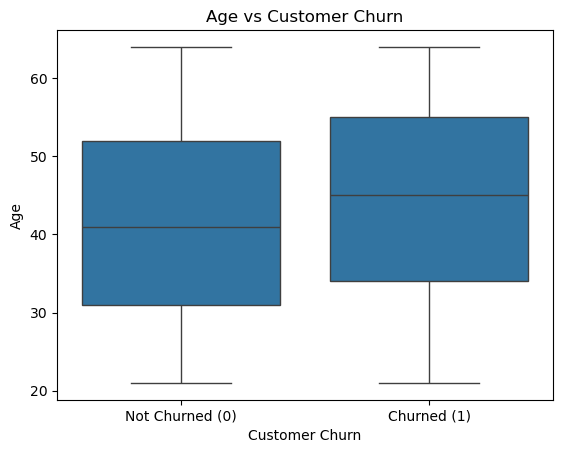

In [17]:
# Customer Churn vs Age
sns.boxplot(x='Customer_Churn', y='Age', data=train)
plt.title("Age vs Customer Churn")
plt.xlabel("Customer Churn")
plt.xticks(ticks=[0,1], labels=["Not Churned (0)", "Churned (1)"])
plt.show()

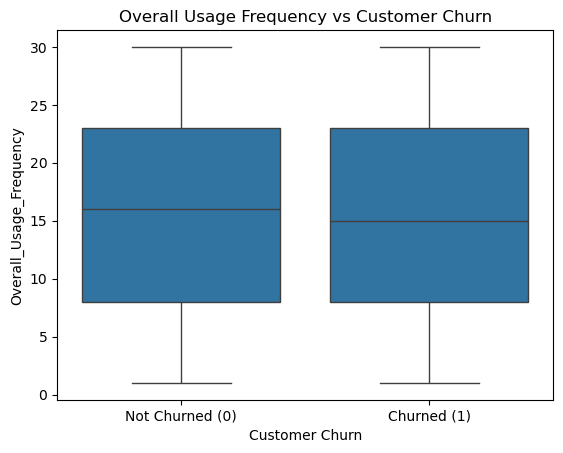

In [159]:
# Customer Churn vs Overall_Usage_Frequency
sns.boxplot(x='Customer_Churn', y='Overall_Usage_Frequency', data=train)
plt.title("Overall Usage Frequency vs Customer Churn")
plt.xlabel("Customer Churn")
plt.xticks(ticks=[0,1], labels=["Not Churned (0)", "Churned (1)"])
plt.show()


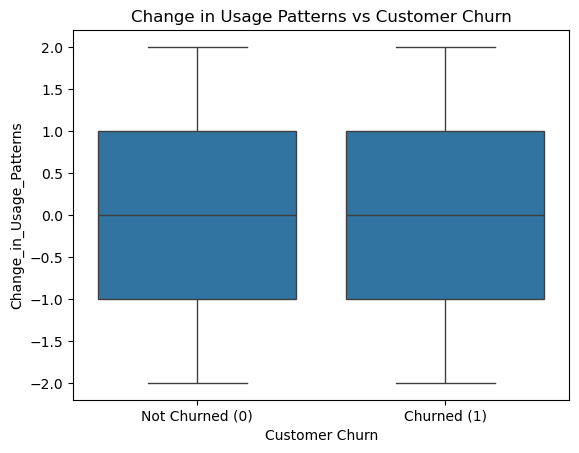

In [162]:
# Customer Churn vs Overall_Usage_Frequency
sns.boxplot(x='Customer_Churn', y='Change_in_Usage_Patterns', data=train)
plt.title("Change in Usage Patterns vs Customer Churn")
plt.xlabel("Customer Churn")
plt.xticks(ticks=[0,1], labels=["Not Churned (0)", "Churned (1)"])
plt.show()

<Axes: xlabel='Change_in_Usage_Patterns', ylabel='Overall_Usage_Frequency'>

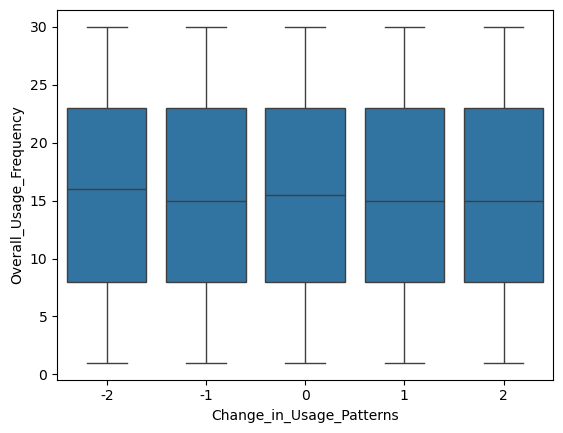

In [161]:
# create scatterplot between overall usuage and change in usuage pattern
sns.boxplot(x='Change_in_Usage_Patterns', y='Overall_Usage_Frequency', data=train)

In [86]:
train['Generation']

0              GenX
1              GenX
2       Millennials
3         BoomersII
4       Millennials
           ...     
4995           GenX
4996           GenX
4997           GenX
4998    Millennials
4999    Millennials
Name: Generation, Length: 5000, dtype: category
Categories (4, object): ['GenZ' < 'Millennials' < 'GenX' < 'BoomersII']

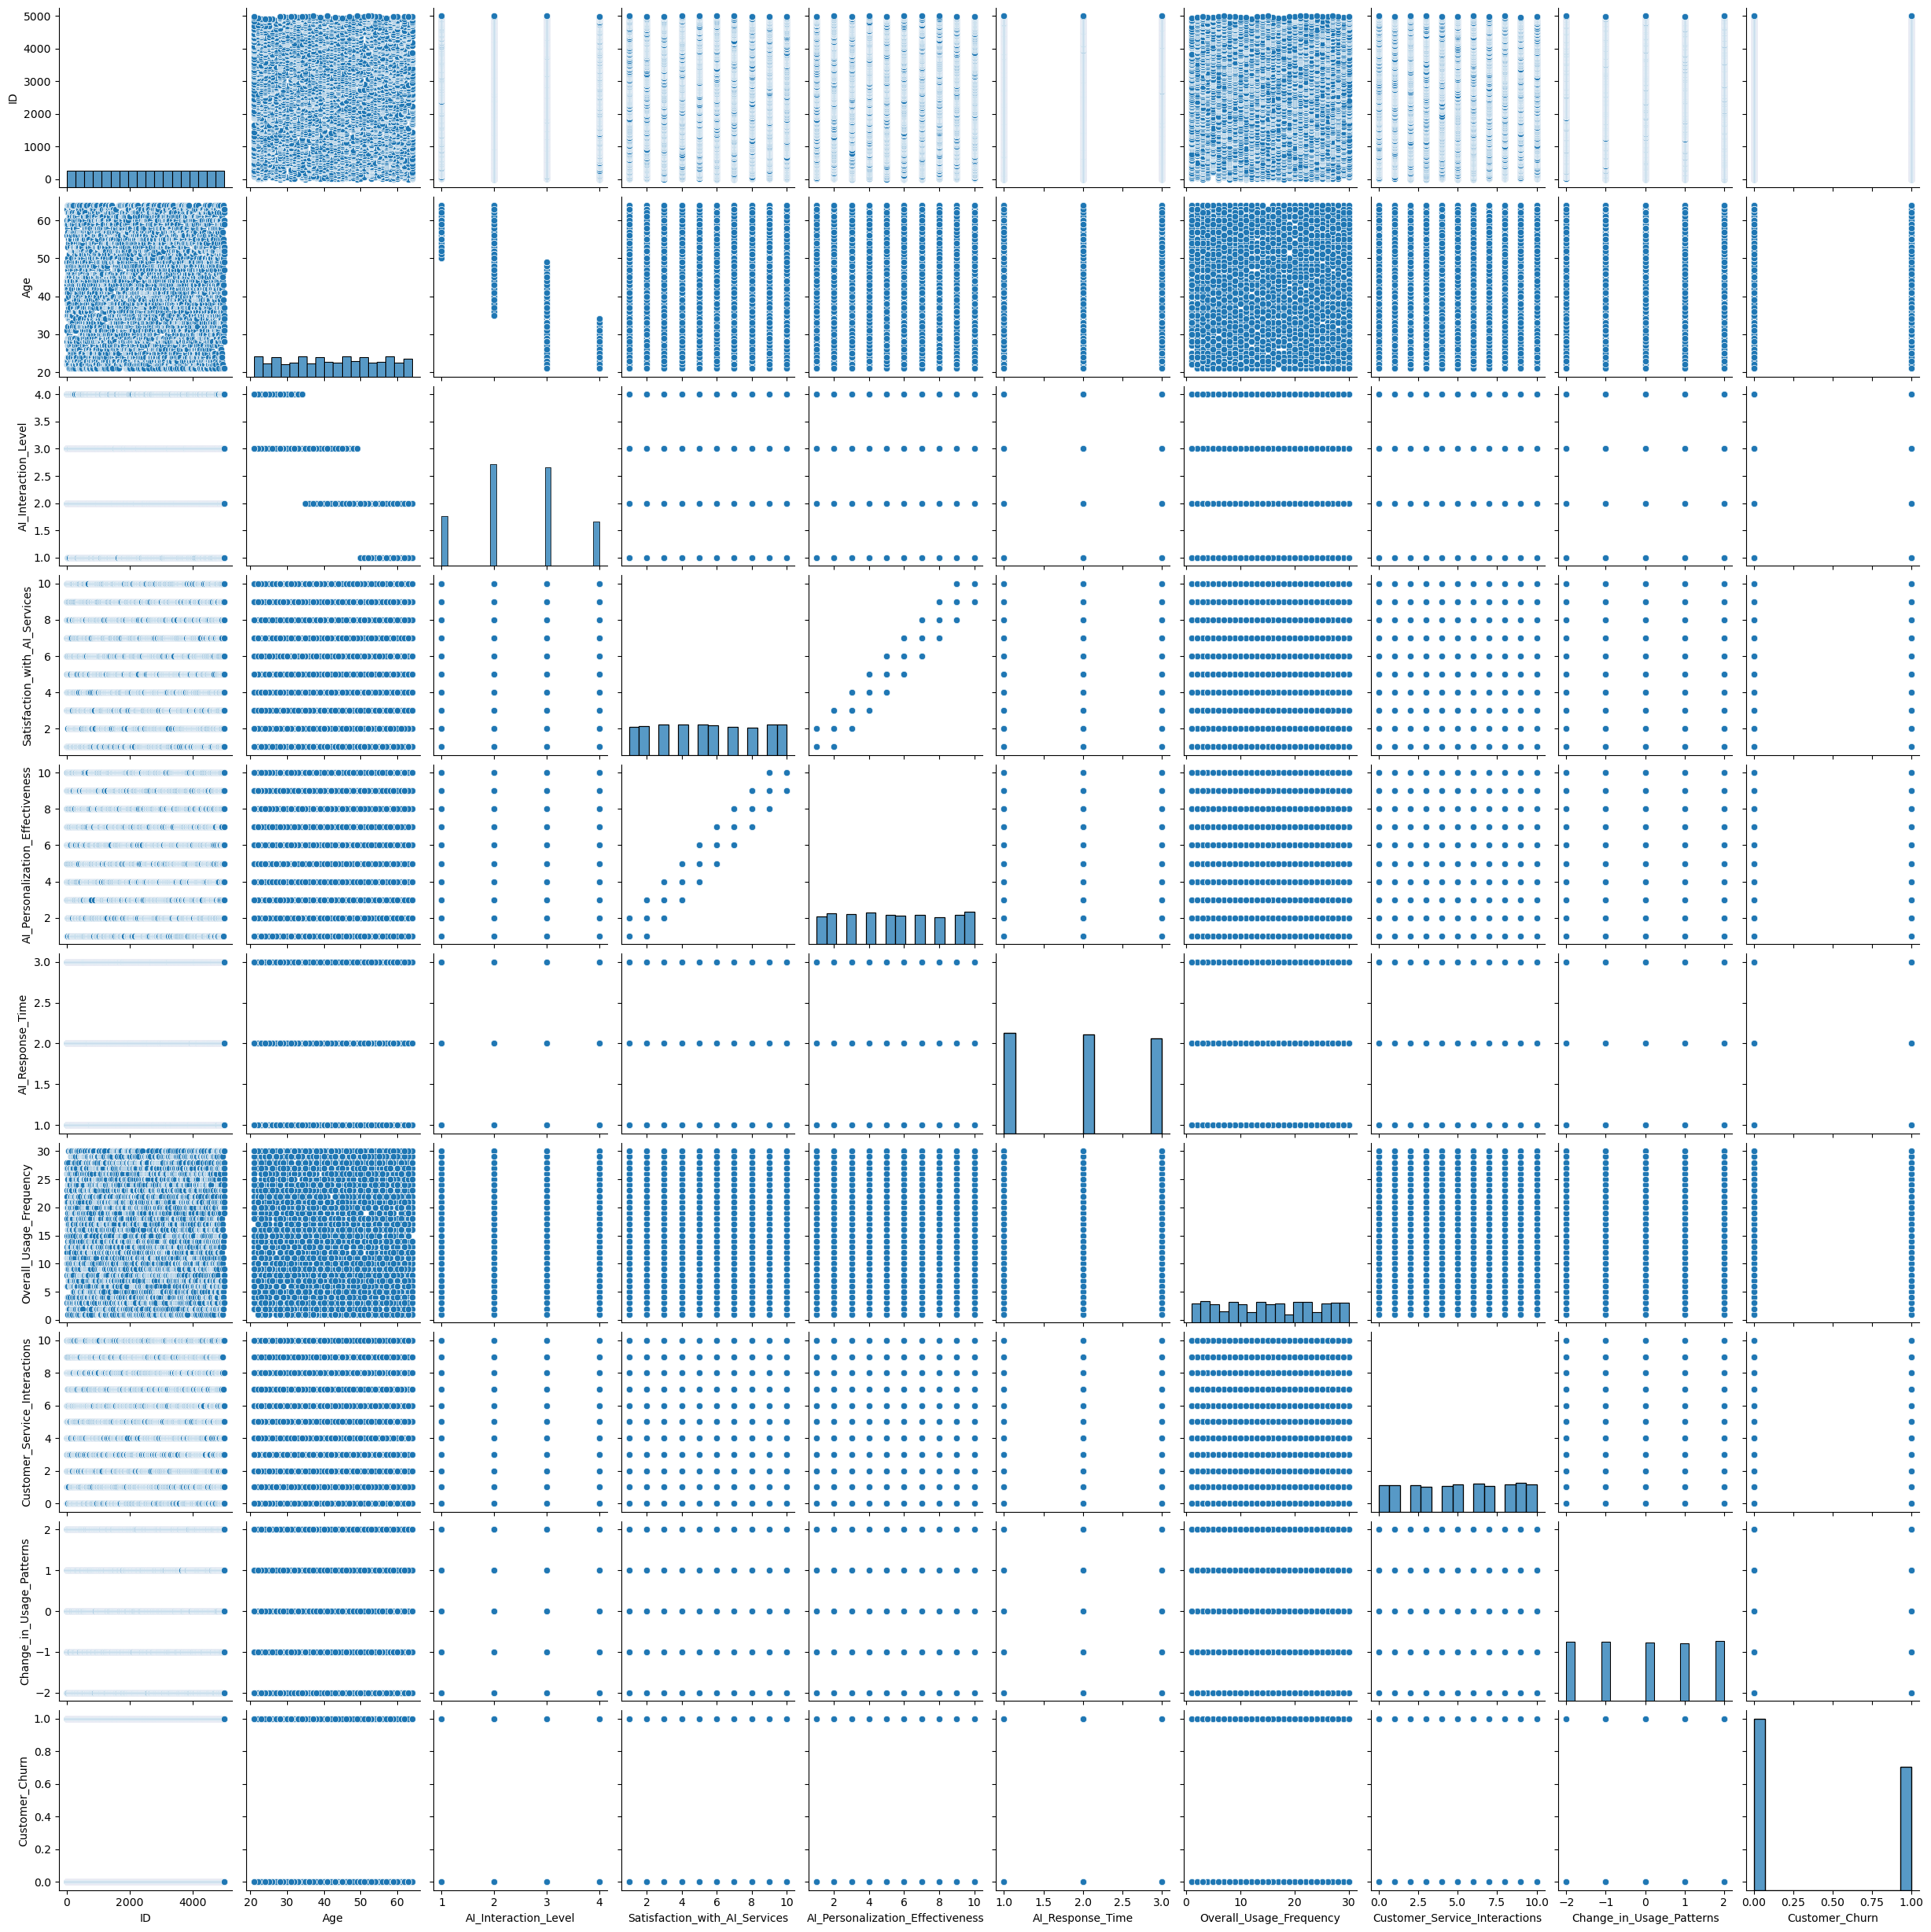

In [19]:
sns.pairplot(train)

<Axes: xlabel='Age', ylabel='AI_Interaction_Level'>

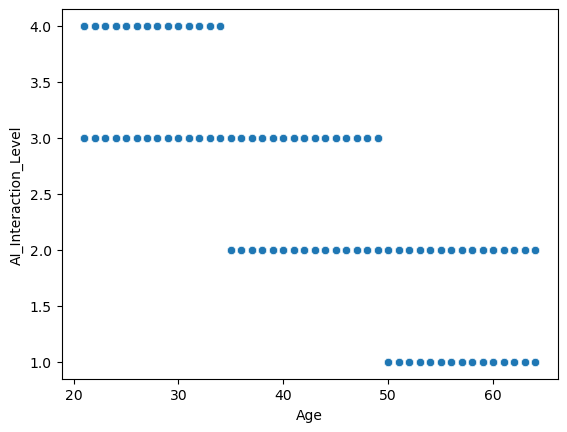

In [20]:
sns.scatterplot(x='Age', y='AI_Interaction_Level', data=train)

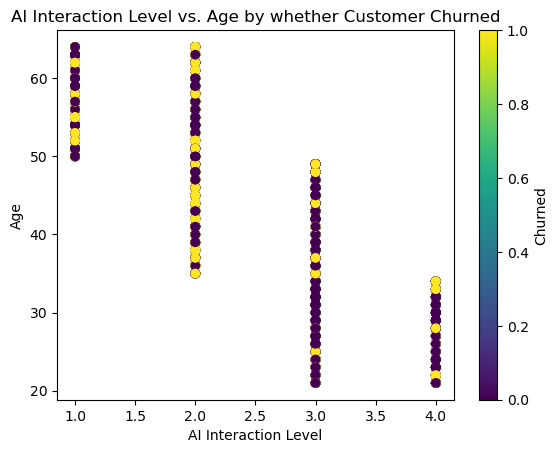

In [77]:
fig, ax = plt.subplots()
pos = ax.scatter(train['AI_Interaction_Level'], train['Age'], c=train['Customer_Churn'])

ax.set_title('AI Interaction Level vs. Age by whether Customer Churned') 
ax.set_xlabel('AI Interaction Level') 
ax.set_ylabel('Age') 

cbar = fig.colorbar(pos, ax=ax)
cbar.set_label('Churned', rotation=90)

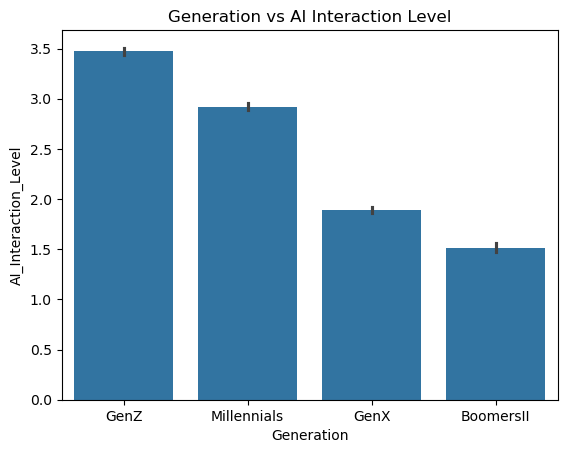

In [137]:
# create Generation feature
# Age ranges from 21-65 years
# GenZ: 12-27
# Millennials: 28-43
# GenX: 44-59
# Boomers II: 60-69

bins = [19, 27, 43, 59, 69]
labels = ['GenZ', 'Millennials', 'GenX', 'BoomersII']
train['Generation'] = pd.cut(train['Age'], bins, labels=labels)
test['Generation'] = pd.cut(test['Age'], bins, labels=labels)

# plot bar plot of Generation vs AI_Interaction_Level
sns.barplot(x='Generation', y='AI_Interaction_Level', data=train)
plt.title("Generation vs AI Interaction Level")
plt.show()

In [96]:
# map each generation group to a numerical value 
generation_mapping = {'GenZ': 1,'Millennials': 2,'GenX': 3, 'BoomersII': 4}
train['Generation'] = train['Generation'].map(generation_mapping)
test['Generation'] = test['Generation'].map(generation_mapping)

# drop Age for now?
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

In [98]:
train.head()

,ID,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn,Generation
0,1,2,7,7,2,18,5,2,1,3
1,2,2,6,5,1,3,2,0,0,3
2,3,2,3,3,3,8,2,1,1,2
3,4,2,3,3,2,6,6,2,1,4
4,5,4,6,6,1,11,3,-1,0,2


### Split labels in train and test data

In [99]:
# split labels and predictors for train and test set
# did not include 'Generation' feature
X_train = train.drop(["ID", "Customer_Churn"], axis=1)
Y_train = train["Customer_Churn"]

X_test = test.drop(["ID", "Customer_Churn"], axis=1)
Y_test = test["Customer_Churn"]

### Forward Selection using SVM

In [33]:
# using SVM
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, Y_train)

SVC()

In [35]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(svc,
          direction = 'forward')

In [36]:
sfs_forward_best = sfs1.fit(X_train, Y_train)

In [40]:
print(sfs_forward_best.get_feature_names_out())

['AI_Interaction_Level' 'Satisfaction_with_AI_Services' 'AI_Response_Time'
 'Customer_Service_Interactions']


In [50]:
# filter selected predictors
X_train_sel = X_train[['AI_Interaction_Level', 'Satisfaction_with_AI_Services', 'AI_Response_Time', 'Customer_Service_Interactions']]

In [51]:
X_test_sel = X_test[['AI_Interaction_Level', 'Satisfaction_with_AI_Services', 'AI_Response_Time', 'Customer_Service_Interactions']]

In [52]:
svc.fit(X_train_sel, Y_train)
y_pred = svc.predict(X_test_sel)

Classification Report:               precision    recall  f1-score   support

           0       0.58      0.90      0.71       714
           1       0.51      0.14      0.22       536

    accuracy                           0.57      1250
   macro avg       0.55      0.52      0.46      1250
weighted avg       0.55      0.57      0.50      1250

Accuracy Score: 0.5744


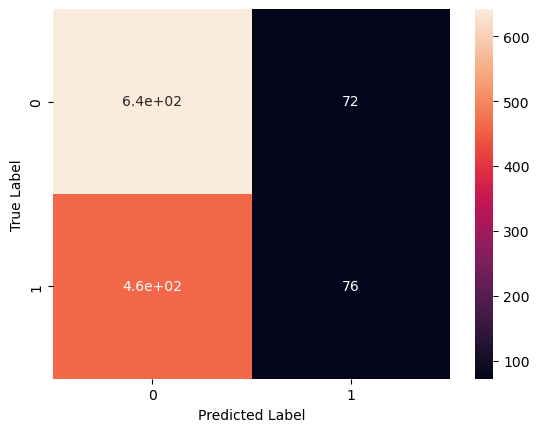

In [60]:
print_classification_report(Y_test, y_pred)
print_conf_matrix(Y_test, y_pred)

### Using logisitc regression

Classification Report:               precision    recall  f1-score   support

           0       0.60      0.83      0.69       714
           1       0.52      0.25      0.34       536

    accuracy                           0.58      1250
   macro avg       0.56      0.54      0.52      1250
weighted avg       0.56      0.58      0.54      1250

Accuracy Score: 0.58


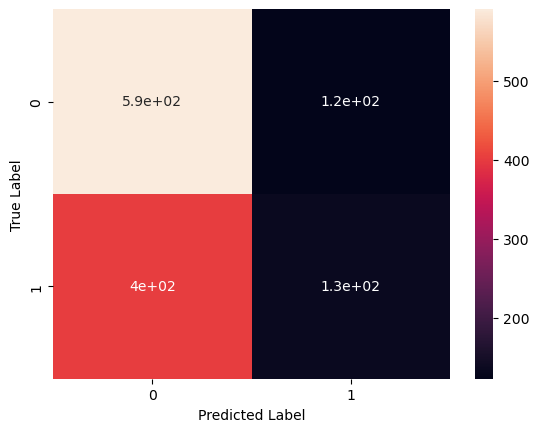

In [61]:
# using logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_sel, Y_train)
y_pred_lr = logreg.predict(X_test_sel)

print_classification_report(Y_test, y_pred_lr)
print_conf_matrix(Y_test, y_pred_lr)

Classification Report:               precision    recall  f1-score   support

           0       0.60      0.84      0.70       714
           1       0.54      0.26      0.35       536

    accuracy                           0.59      1250
   macro avg       0.57      0.55      0.52      1250
weighted avg       0.57      0.59      0.55      1250

Accuracy Score: 0.588


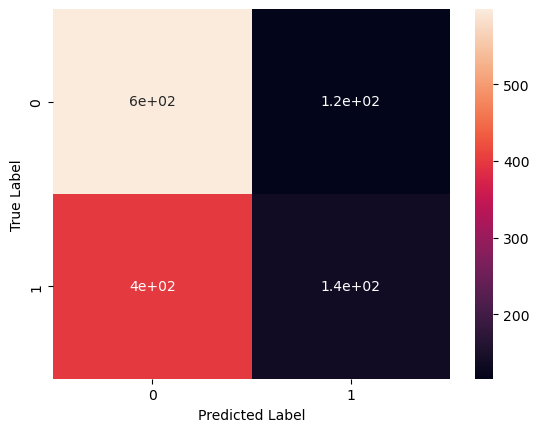

In [62]:
logreg.fit(X_train, Y_train)
y_pred_lr2 = logreg.predict(X_test)

print_classification_report(Y_test, y_pred_lr2)
print_conf_matrix(Y_test, y_pred_lr2)

### Using knn

In [45]:
# using knn
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score, KFold

mean_acc_scores = []

k_vals = range(1, 25)

# initialize KFold for cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# iterate for each k
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_scores = cross_val_score(knn, X_train, Y_train, cv=kf)
    mean_acc = np.mean(accuracy_scores)
    mean_acc_scores.append(mean_acc)


In [46]:
print(mean_acc_scores)

[0.5134000000000001, 0.5682, 0.5267999999999999, 0.5539999999999999, 0.5404000000000001, 0.558, 0.5428000000000001, 0.5634, 0.5426, 0.5592, 0.5392, 0.5571999999999999, 0.54, 0.5534, 0.5464, 0.5542, 0.5520000000000002, 0.5568000000000001, 0.5472000000000001, 0.5572, 0.5471999999999999, 0.5558, 0.5468, 0.5562]


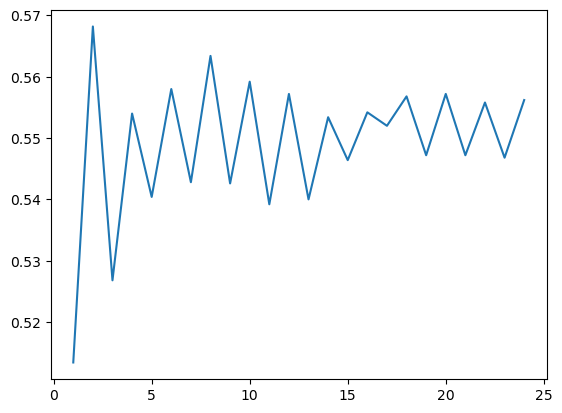

In [47]:
# plot cross validation for estimated accuracy
plt.plot(k_vals, mean_acc_scores)
plt.show()

### Using RFE with logistic regression

Classification Report:               precision    recall  f1-score   support

           0       0.60      0.83      0.70       714
           1       0.54      0.27      0.36       536

    accuracy                           0.59      1250
   macro avg       0.57      0.55      0.53      1250
weighted avg       0.58      0.59      0.55      1250

Accuracy Score: 0.5896


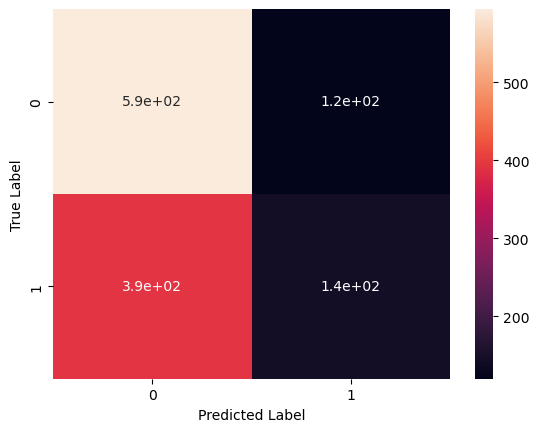

In [100]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(random_state=0, max_iter=1000)
model_LR.fit(X_train, Y_train)

y_pred_LR = model_LR.predict(X_test)

print_classification_report(Y_test, y_pred_LR)
print_conf_matrix(Y_test, y_pred_LR)

In [102]:
# using RFE with logisitic regression
from sklearn.feature_selection import RFE

rfe = RFE(model_LR, n_features_to_select=None)
rfe_fit = rfe.fit(X_train, Y_train)

print(rfe_fit.support_)
print(rfe_fit.ranking_)
X_train.columns[rfe_fit.support_]

[ True  True False  True False False False  True]
[1 1 3 1 4 5 2 1]


Index(['AI_Interaction_Level', 'Satisfaction_with_AI_Services',
       'AI_Response_Time', 'Generation'],
      dtype='object')

Classification Report:               precision    recall  f1-score   support

           0       0.59      0.83      0.69       714
           1       0.52      0.24      0.33       536

    accuracy                           0.58      1250
   macro avg       0.56      0.54      0.51      1250
weighted avg       0.56      0.58      0.54      1250

Accuracy Score: 0.58


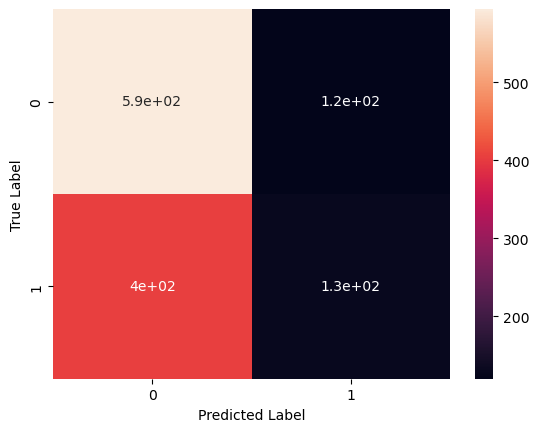

In [103]:
# fitting model to training set with selected features 
model_LR_sel = LogisticRegression(random_state=0)
model_LR_sel.fit(X_train[X_train.columns[rfe_fit.support_]], Y_train)

# predict
y_pred_LR_sel = model_LR_sel.predict(X_test[X_train.columns[rfe_fit.support_]])

print_classification_report(Y_test, y_pred_LR_sel)
print_conf_matrix(Y_test, y_pred_LR_sel)

Classification Report:               precision    recall  f1-score   support

           0       0.60      0.84      0.70       714
           1       0.53      0.24      0.33       536

    accuracy                           0.58      1250
   macro avg       0.56      0.54      0.51      1250
weighted avg       0.57      0.58      0.54      1250

Accuracy Score: 0.5832


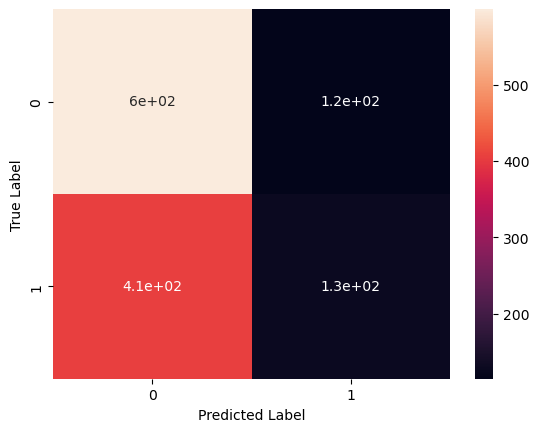

In [104]:
# fitting model to training set without satisfaction
model_LR_sel = LogisticRegression(random_state=0)
model_LR_sel.fit(X_train.drop("Satisfaction_with_AI_Services", axis=1), Y_train)

# predict
y_pred_LR_sel = model_LR_sel.predict(X_test.drop("Satisfaction_with_AI_Services", axis=1))

print_classification_report(Y_test, y_pred_LR_sel)
print_conf_matrix(Y_test, y_pred_LR_sel)

Classification Report:               precision    recall  f1-score   support

           0       0.60      0.83      0.70       714
           1       0.54      0.26      0.35       536

    accuracy                           0.59      1250
   macro avg       0.57      0.55      0.53      1250
weighted avg       0.58      0.59      0.55      1250

Accuracy Score: 0.5888


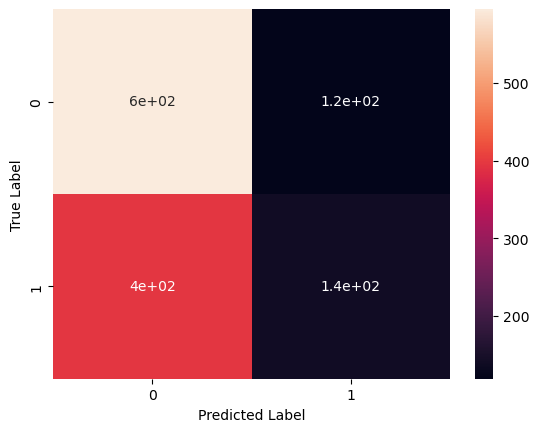

In [105]:
# fitting model to training set without satisfaction
model_LR_sel = LogisticRegression(random_state=0)
model_LR_sel.fit(X_train.drop("AI_Personalization_Effectiveness", axis=1), Y_train)

# predict
y_pred_LR_sel = model_LR_sel.predict(X_test.drop("AI_Personalization_Effectiveness", axis=1))

print_classification_report(Y_test, y_pred_LR_sel)
print_conf_matrix(Y_test, y_pred_LR_sel)

### Using decision tree

Classification Report:               precision    recall  f1-score   support

           0       0.67      0.67      0.67       714
           1       0.56      0.56      0.56       536

    accuracy                           0.62      1250
   macro avg       0.61      0.61      0.61      1250
weighted avg       0.62      0.62      0.62      1250

Accuracy Score: 0.6216


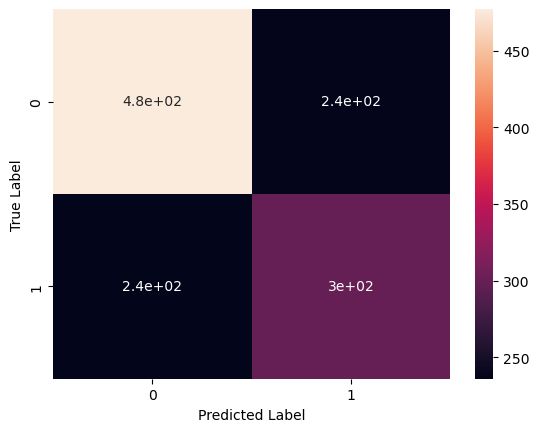

In [120]:
# using decision tree with all predictors 
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_train, Y_train)

y_pred_dt = decisiontree.predict(X_test)
print_classification_report(Y_test, y_pred_dt)
print_conf_matrix(Y_test, y_pred_dt)

Classification Report:               precision    recall  f1-score   support

           0       0.67      0.67      0.67       714
           1       0.56      0.56      0.56       536

    accuracy                           0.62      1250
   macro avg       0.62      0.62      0.62      1250
weighted avg       0.62      0.62      0.62      1250

Accuracy Score: 0.624


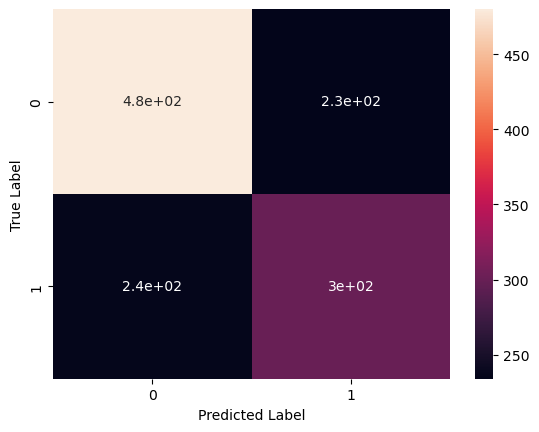

In [121]:
# using decision tree with all predictors 
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_train.drop("Satisfaction_with_AI_Services", axis=1), Y_train)

y_pred_dt = decisiontree.predict(X_test.drop("Satisfaction_with_AI_Services", axis=1))
print_classification_report(Y_test, y_pred_dt)
print_conf_matrix(Y_test, y_pred_dt)

Classification Report:               precision    recall  f1-score   support

           0       0.65      0.67      0.66       714
           1       0.54      0.53      0.53       536

    accuracy                           0.61      1250
   macro avg       0.60      0.60      0.60      1250
weighted avg       0.60      0.61      0.61      1250

Accuracy Score: 0.6064


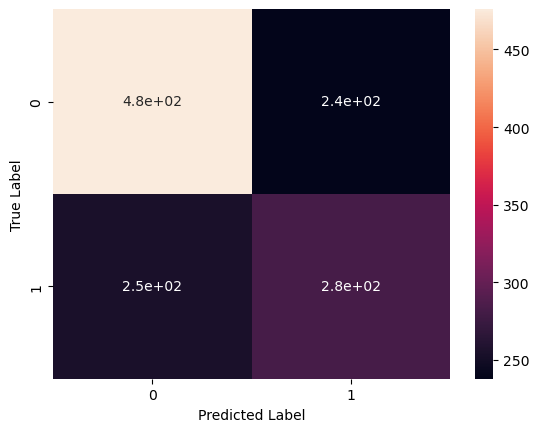

In [124]:
decisiontree.fit(X_train.drop("AI_Personalization_Effectiveness", axis=1), Y_train)

y_pred_dt = decisiontree.predict(X_test.drop("AI_Personalization_Effectiveness", axis=1))
print_classification_report(Y_test, y_pred_dt)
print_conf_matrix(Y_test, y_pred_dt)

In [122]:
# run forward selection with decision tree
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(decisiontree,
          direction = 'forward')

sfs_forward_best = sfs1.fit(X_train, Y_train)
print(sfs_forward_best.get_feature_names_out())

['AI_Interaction_Level' 'Satisfaction_with_AI_Services'
 'AI_Personalization_Effectiveness' 'Overall_Usage_Frequency']


Classification Report:               precision    recall  f1-score   support

           0       0.64      0.72      0.68       714
           1       0.55      0.45      0.49       536

    accuracy                           0.61      1250
   macro avg       0.59      0.59      0.59      1250
weighted avg       0.60      0.61      0.60      1250

Accuracy Score: 0.6064


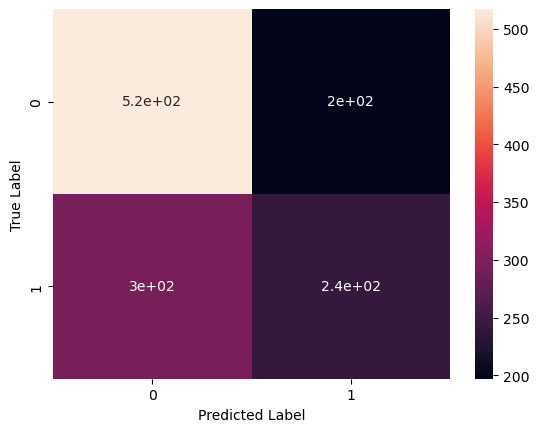

In [123]:
# rerun decision tree with selected features
X_train_sel = X_train[['AI_Interaction_Level', 'Satisfaction_with_AI_Services', 'AI_Personalization_Effectiveness', 'Overall_Usage_Frequency']]
X_test_sel = X_test[['AI_Interaction_Level', 'Satisfaction_with_AI_Services', 'AI_Personalization_Effectiveness', 'Overall_Usage_Frequency']]
decisiontree.fit(X_train_sel, Y_train)

y_pred_dt = decisiontree.predict(X_test_sel)
print_classification_report(Y_test, y_pred_dt)
print_conf_matrix(Y_test, y_pred_dt)

In [125]:
# run backward selection with decision tree
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(decisiontree,
          direction = 'backward')

sfs_forward_best = sfs1.fit(X_train, Y_train)
print(sfs_forward_best.get_feature_names_out())

['AI_Interaction_Level' 'AI_Personalization_Effectiveness'
 'AI_Response_Time' 'Generation']


Classification Report:               precision    recall  f1-score   support

           0       0.60      0.72      0.66       714
           1       0.49      0.36      0.42       536

    accuracy                           0.57      1250
   macro avg       0.55      0.54      0.54      1250
weighted avg       0.56      0.57      0.55      1250

Accuracy Score: 0.568


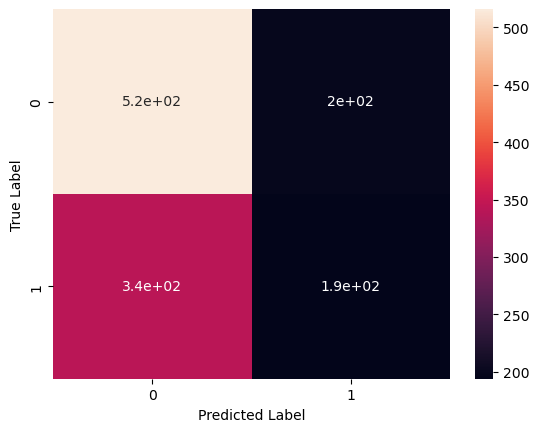

In [126]:
# rerun decision tree with selected features
X_train_sel = X_train[['AI_Interaction_Level', 'AI_Personalization_Effectiveness', 'AI_Response_Time', 'Generation']]
X_test_sel = X_test[['AI_Interaction_Level', 'AI_Personalization_Effectiveness', 'AI_Response_Time', 'Generation']]
decisiontree.fit(X_train_sel, Y_train)

y_pred_dt = decisiontree.predict(X_test_sel)
print_classification_report(Y_test, y_pred_dt)
print_conf_matrix(Y_test, y_pred_dt)

### Using random forest

Classification Report:               precision    recall  f1-score   support

           0       0.69      0.75      0.72       714
           1       0.62      0.56      0.59       536

    accuracy                           0.66      1250
   macro avg       0.66      0.65      0.65      1250
weighted avg       0.66      0.66      0.66      1250

Accuracy Score: 0.6648


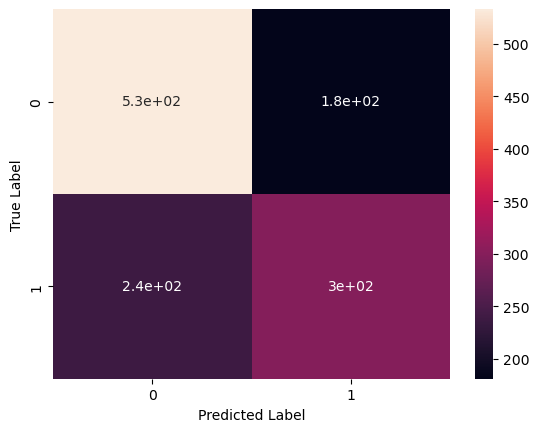

In [138]:
# use random forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=0)
randomforest.fit(X_train, Y_train)
y_pred_RF = randomforest.predict(X_test)

print_classification_report(Y_test, y_pred_RF)
print_conf_matrix(Y_test, y_pred_RF)

Classification Report:               precision    recall  f1-score   support

           0       0.67      0.74      0.70       714
           1       0.60      0.53      0.56       536

    accuracy                           0.65      1250
   macro avg       0.64      0.63      0.63      1250
weighted avg       0.64      0.65      0.64      1250

Accuracy Score: 0.6464


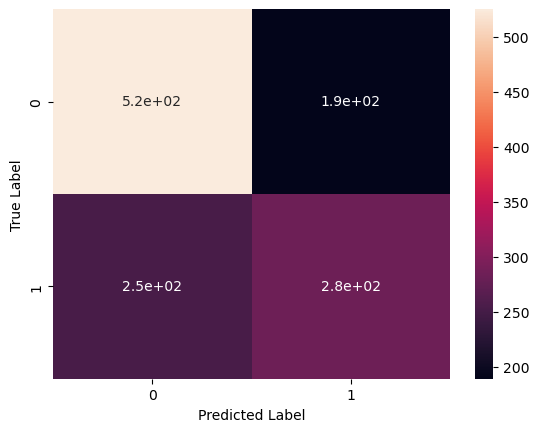

In [139]:
randomforest.fit(X_train.drop("AI_Personalization_Effectiveness", axis=1), Y_train)
y_pred_RF = randomforest.predict(X_test.drop("AI_Personalization_Effectiveness", axis=1))

print_classification_report(Y_test, y_pred_RF)
print_conf_matrix(Y_test, y_pred_RF)

Classification Report:               precision    recall  f1-score   support

           0       0.69      0.75      0.72       714
           1       0.62      0.56      0.59       536

    accuracy                           0.67      1250
   macro avg       0.66      0.65      0.65      1250
weighted avg       0.66      0.67      0.66      1250

Accuracy Score: 0.6656


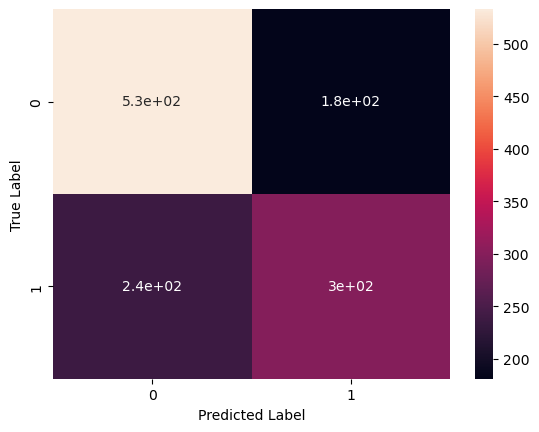

In [145]:
# increase number of branches (default=100)

randomforest_200 = RandomForestClassifier(random_state=0, n_estimators=200)
randomforest_200.fit(X_train, Y_train)
y_pred_RF = randomforest_200.predict(X_test)

print_classification_report(Y_test, y_pred_RF)
print_conf_matrix(Y_test, y_pred_RF)

Classification Report:               precision    recall  f1-score   support

           0       0.69      0.74      0.71       714
           1       0.62      0.55      0.58       536

    accuracy                           0.66      1250
   macro avg       0.65      0.65      0.65      1250
weighted avg       0.66      0.66      0.66      1250

Accuracy Score: 0.6592


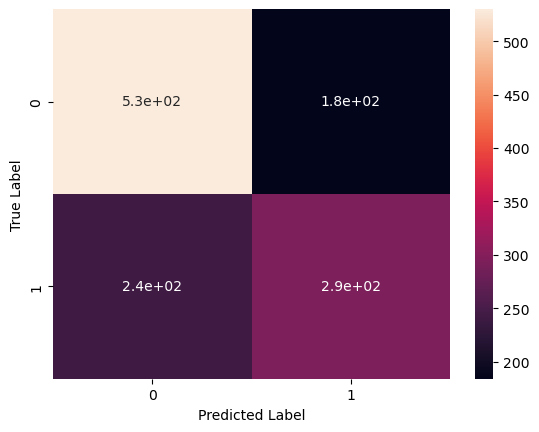

In [140]:
# standardized version
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), randomforest) 
pipe.fit(X_train, Y_train) # apply scaling on training set
pipe.score(X_test, Y_test)

y_pred_RF_st = pipe.predict(X_test)

print_classification_report(Y_test, y_pred_RF_st)
print_conf_matrix(Y_test, y_pred_RF_st)

### Accuracy highest

In [149]:
# Get numerical feature importances
importances = list(randomforest.feature_importances_)
print(importances)

[0.08331554023407567, 0.11947273600093611, 0.11567137371185485, 0.07164104370568776, 0.25668600410808273, 0.18352654944571312, 0.10842137871279393, 0.06126537408085587]


In [155]:
X_train

,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Generation
0,2,7,7,2,18,5,2,3
1,2,6,5,1,3,2,0,3
2,2,3,3,3,8,2,1,2
3,2,3,3,2,6,6,2,4
4,4,6,6,1,11,3,-1,2
...,...,...,...,...,...,...,...,...
4995,1,5,6,1,7,2,2,3
4996,1,4,4,2,22,0,0,3
4997,3,6,6,3,15,8,2,3
4998,3,7,8,1,21,6,0,2


Classification Report:               precision    recall  f1-score   support

           0       0.77      0.78      0.77       714
           1       0.70      0.68      0.69       536

    accuracy                           0.74      1250
   macro avg       0.73      0.73      0.73      1250
weighted avg       0.74      0.74      0.74      1250

Accuracy Score: 0.7392


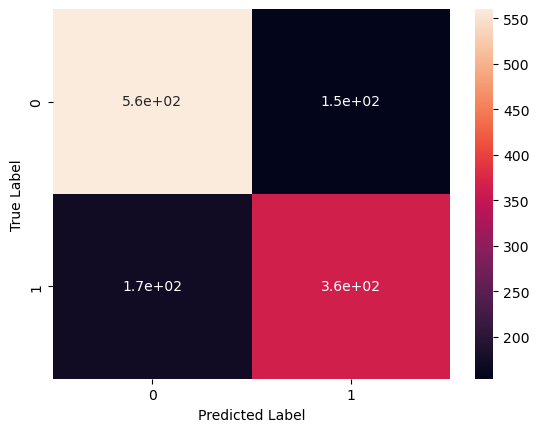

In [152]:
# redo random forest using most important features (top 5)
X_train_impor = X_train[['Overall_Usage_Frequency', 'Customer_Service_Interactions', 'Satisfaction_with_AI_Services', 'AI_Personalization_Effectiveness', 'Change_in_Usage_Patterns']]
X_test_impor = X_test[['Overall_Usage_Frequency', 'Customer_Service_Interactions', 'Satisfaction_with_AI_Services', 'AI_Personalization_Effectiveness', 'Change_in_Usage_Patterns']]

randomforest.fit(X_train_impor, Y_train)
y_pred_RF = randomforest.predict(X_test_impor)

print_classification_report(Y_test, y_pred_RF)
print_conf_matrix(Y_test, y_pred_RF)

### Hyperparameter tuning with random forest

In [141]:
# hyperparemeter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=randomforest, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_rf = grid_search.best_estimator_

randomforest.fit(X_train, Y_train)

# Get feature importances
feature_importances = randomforest.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.08331554 0.11947274 0.11567137 0.07164104 0.256686   0.18352655
 0.10842138 0.06126537]


Classification Report:               precision    recall  f1-score   support

           0       0.59      0.83      0.69       714
           1       0.52      0.24      0.33       536

    accuracy                           0.58      1250
   macro avg       0.56      0.54      0.51      1250
weighted avg       0.56      0.58      0.54      1250

Accuracy Score: 0.5808


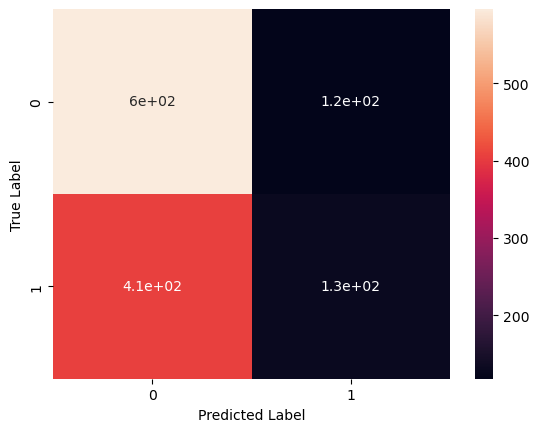

In [144]:
from sklearn.feature_selection import SelectFromModel

threshold = np.mean(feature_importances)
selected_features = SelectFromModel(randomforest, threshold=threshold)
X_train_selected = selected_features.fit_transform(X_train, Y_train)
X_test_selected = selected_features.transform(X_test)
best_rf.fit(X_train_selected, Y_train)

y_pred_best = best_rf.predict(X_test_selected)

print_classification_report(Y_test, y_pred_best)
print_conf_matrix(Y_test, y_pred_best)

### Evaluate Model function

In [108]:
# print classification report and accuracy

def print_classification_report(y_true, y_pred):
    print("Classification Report:", classification_report(y_true, y_pred))
    acc_model = accuracy_score(y_true, y_pred)
    print("Accuracy Score:", acc_model)

    return acc_model

In [109]:
# plot confusion matrix for model

def print_conf_matrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")